In [1]:
import torch 
import torch.nn as nn 
import numpy as np 
import matplotlib.pyplot as plt


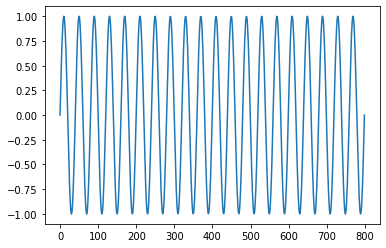

In [2]:
x=torch.linspace(0,800,800)
s=torch.sin(2*np.pi*x/40)
plt.plot(s)

In [3]:
train_seq=s[:760]
test_seq=s[761:]

In [4]:
def input_data(seq,ws):
    op=[]
    L=len(seq)
    for i in range(L-ws):
        win=seq[i:i+ws]
        lab=seq[i+ws:i+ws+1]
        op.append((win,lab))
    return op 
ws=40
train_dat=input_data(train_seq,ws)

In [5]:
class LSTM_mod(nn.Module):
    def __init__(self,ip_size=1,hid_size=50,out_size=1):
        super(LSTM_mod,self).__init__()
        self.hid_size=hid_size
        self.lstm=nn.LSTM(ip_size,self.hid_size)
        self.lin=nn.Linear(self.hid_size,out_size)
        self.hidden=(torch.zeros(1,1,hid_size),torch.zeros(1,1,hid_size))
    def forward(self,seq):
        lstm_out,self.hidden=self.lstm(seq.view(len(seq),1,-1),self.hidden)
        pred=self.lin(lstm_out.view(len(seq),1,-1))
        return(pred[-1])


In [11]:
torch.manual_seed(42)
model=LSTM_mod()
crit=nn.MSELoss()
opt=torch.optim.Adam(model.parameters())
model

LSTM_mod(
  (lstm): LSTM(1, 50)
  (lin): Linear(in_features=50, out_features=1, bias=True)
)

In [12]:
def train_single_epoch(d_train,mod,opt,crit,disp_int=10):
    b_loss_tracker=[]
    for b,ex in enumerate(d_train):
        opt.zero_grad()
        pred=mod.forward(ex[0])
        loss_val=crit(pred,ex[1])
        b_loss_tracker.append(loss_val.item())
        loss_val.backward()
        opt.step()
        if(b%disp_int==0):
            print(f'Batch: {b} Loss:{b_loss_tracker[b]:0.4f}')
        mod.hidden=(torch.zeros(1,1,mod.hid_size),torch.zeros(1,1,mod.hid_size))
    return(mod,b_loss_tracker)
def train_mod(num_epochs,dat,mod,opt,crit,disp_int=10):
    epoch_loss_tracker=[]
    for i in range(num_epochs):
        print(f'_______________Epoch:{i}_____________________')
        mod,b_loss_track=train_single_epoch(dat,mod,opt,crit,disp_int=disp_int)
        epoch_loss_tracker.extend(b_loss_track)
    return(mod,epoch_loss_tracker)
num_epochs=5
dat=train_dat
mod,epoch_loss=train_mod(10,dat,model,opt,crit,disp_int=20)


_______________Epoch:0_____________________
Batch: 0 Loss:0.0184
Batch: 20 Loss:0.0379
Batch: 40 Loss:0.0029
Batch: 60 Loss:0.0157
Batch: 80 Loss:0.0415
Batch: 100 Loss:0.1659
Batch: 120 Loss:0.0933
Batch: 140 Loss:0.0938
Batch: 160 Loss:0.1305
Batch: 180 Loss:0.0003
Batch: 200 Loss:0.0189
Batch: 220 Loss:0.0093
Batch: 240 Loss:0.0405
Batch: 260 Loss:0.0965
Batch: 280 Loss:0.0228
Batch: 300 Loss:0.0515
Batch: 320 Loss:0.0151
Batch: 340 Loss:0.0019
Batch: 360 Loss:0.0442
Batch: 380 Loss:0.0079
Batch: 400 Loss:0.0017
Batch: 420 Loss:0.0010
Batch: 440 Loss:0.0025
Batch: 460 Loss:0.0003
Batch: 480 Loss:0.0006
Batch: 500 Loss:0.0066
Batch: 520 Loss:0.0005
Batch: 540 Loss:0.0001
Batch: 560 Loss:0.0209
Batch: 580 Loss:0.0011
Batch: 600 Loss:0.0001
Batch: 620 Loss:0.0026
Batch: 640 Loss:0.0081
Batch: 660 Loss:0.0081
Batch: 680 Loss:0.0013
Batch: 700 Loss:0.0028
_______________Epoch:1_____________________
Batch: 0 Loss:0.0180
Batch: 20 Loss:0.0054
Batch: 40 Loss:0.0011
Batch: 60 Loss:0.0659
Bat

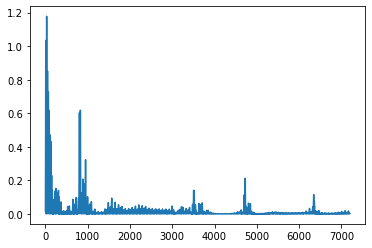

In [13]:
plt.plot(epoch_loss)

In [19]:
pred_dat=[]
for i in range(len(train_dat)):
    ip_dat_pred=mod.forward(train_dat[i][0])
    pred_dat.append(np.squeeze(ip_dat_pred.detach().numpy()))

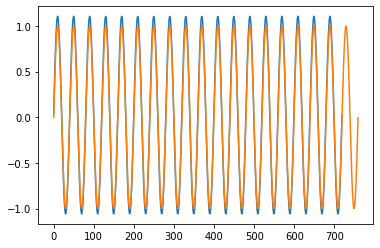

In [21]:
plt.plot(pred_dat)
plt.plot(s[:760])